In [72]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [74]:

from pandas_datareader.data import DataReader

In [75]:
#importing Data from the online platfrom
from pandas_datareader import data

In [76]:
from datetime import datetime

In [77]:
from __future__ import division

In [78]:
#Passing the Ticker for the Stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [79]:
#Setting up data and time for the current data
#Data which is one year ago from the current date
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [80]:
#For grabing the information from the Yahoo Finance 
#We are using this code
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [81]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,145.319763
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574020
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,145.966080
2021-07-23,148.720001,146.919998,147.550003,148.559998,71447400.0,147.716064
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.143616


- Open represents the Opening Price of the stock
- Close represrnts the closing Price of teh stock
- Volume represents volume traded that stock
- Here 'Adj Close' represents ajusted closing price


In [82]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,158.013992,154.267944,156.038300,156.230415,8.849140e+07,155.858077
std,12.747848,12.434306,12.672732,12.579155,2.659781e+07,12.565784
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.949997,145.250000,146.190002,146.500000,7.020790e+07,145.966080
50%,154.630005,150.380005,151.889999,152.509995,8.347440e+07,151.930588
75%,169.679993,165.500000,167.479996,166.559998,1.023002e+08,166.315643
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [83]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-07-20 to 2022-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

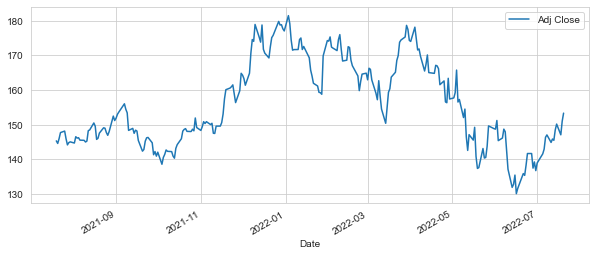

In [84]:
#Here 'Adj Close' represents ajusted closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

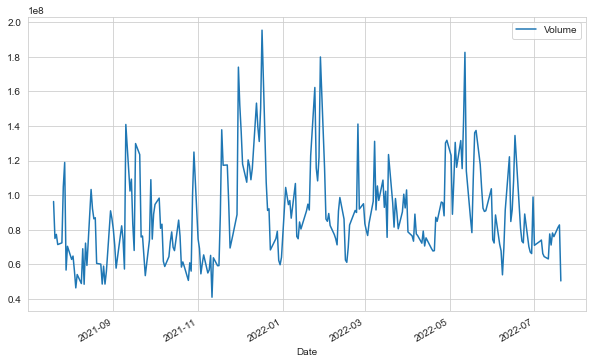

In [85]:
AAPL['Volume'].plot(legend=True,figsize=(10,6))

In [86]:
#Calculating 10 day,20 day, 50 day moving average
ma_day = [10,20,50]

#We are making a new column by column_name which is string
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

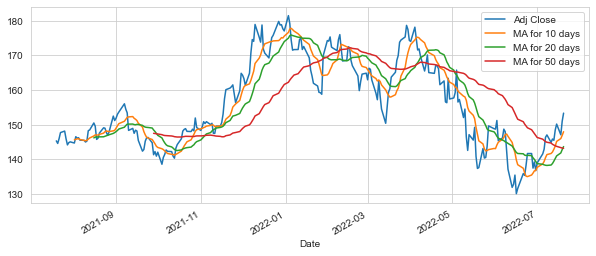

In [87]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

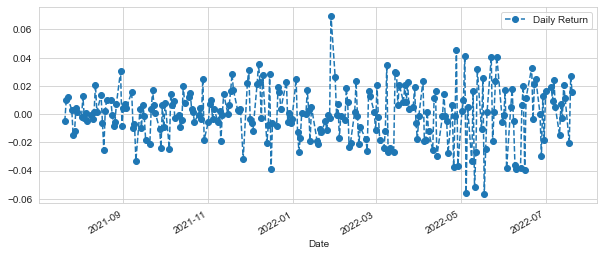

In [88]:
#Creating a new column Daily Retun and applying percentage change function on it

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10,4),legend = True,linestyle='--',marker='o')

In [89]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,145.319763,NaN,NaN,NaN,NaN
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574020,NaN,NaN,NaN,-0.005132
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,145.966080,NaN,NaN,NaN,0.009629
2021-07-23,148.720001,146.919998,147.550003,148.559998,71447400.0,147.716064,NaN,NaN,NaN,0.011989
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.143616,NaN,NaN,NaN,0.002894


In [90]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-07-20 to 2022-07-20
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            253 non-null    float64
 1   Low             253 non-null    float64
 2   Open            253 non-null    float64
 3   Close           253 non-null    float64
 4   Volume          253 non-null    float64
 5   Adj Close       253 non-null    float64
 6   MA for 10 days  244 non-null    float64
 7   MA for 20 days  234 non-null    float64
 8   MA for 50 days  204 non-null    float64
 9   Daily Return    252 non-null    float64
dtypes: float64(10)
memory usage: 21.7 KB


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

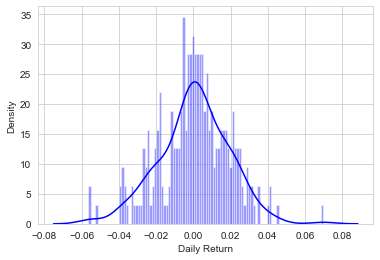

In [91]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [92]:
#To analyse all the returns of all the stock in our list
#Creating a Data Frame with Closing date
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [93]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2021-07-20,145.319733,131.101501,277.057678,178.659500,660.500000
2021-07-21,144.574005,132.600494,279.120819,179.259995,655.289978
2021-07-22,145.966064,133.328506,283.822418,181.901505,649.260010
2021-07-23,147.716034,137.815994,287.323853,182.832001,643.380005
2021-07-26,148.143616,139.644501,286.708832,184.990997,657.619995


In [94]:
#Getting the daily returns for our stocks
tech_rets = closing_df.pct_change()

In [95]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2021-07-20,NaN,NaN,NaN,NaN,NaN
2021-07-21,-0.005132,0.011434,0.007447,0.003361,-0.007888
2021-07-22,0.009629,0.005490,0.016844,0.014736,-0.009202
2021-07-23,0.011989,0.033657,0.012337,0.005115,-0.009056
2021-07-26,0.002895,0.013268,-0.002141,0.011809,0.022133


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


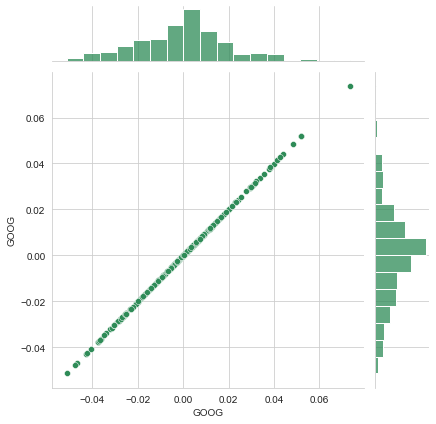

In [96]:

#comparing Google to itself
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


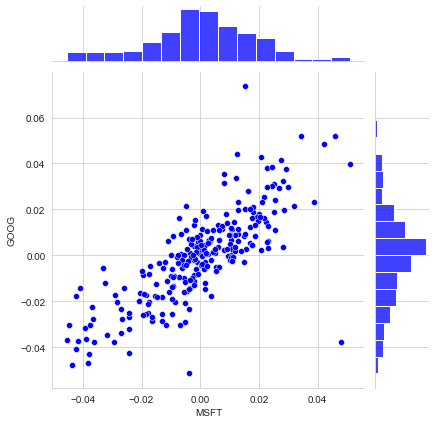

In [97]:
sns.jointplot('MSFT','GOOG',tech_rets,kind = 'scatter',color='blue')

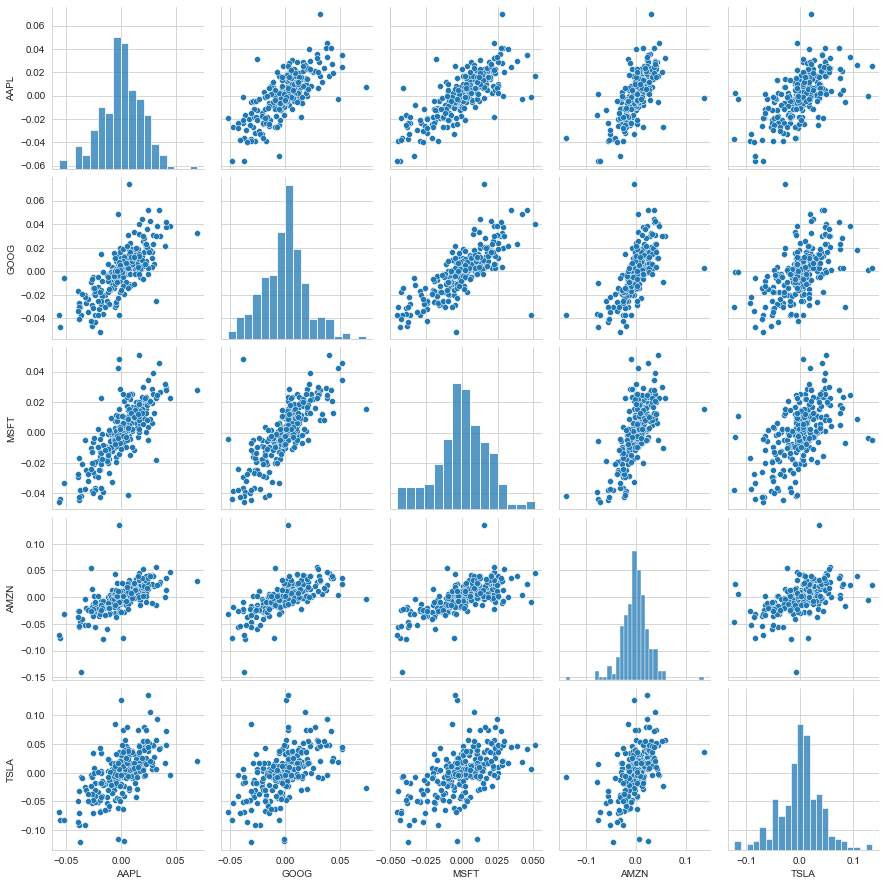

In [98]:
sns.pairplot(tech_rets.dropna())
#We have Histogram for every stock for daily return

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

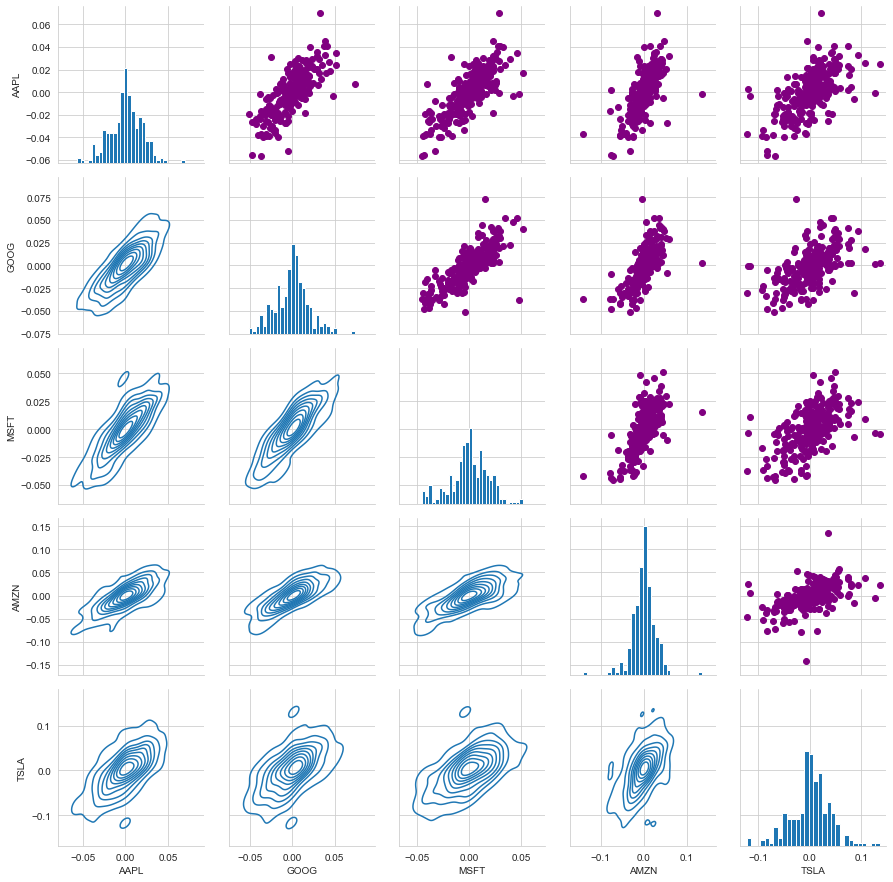

In [99]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

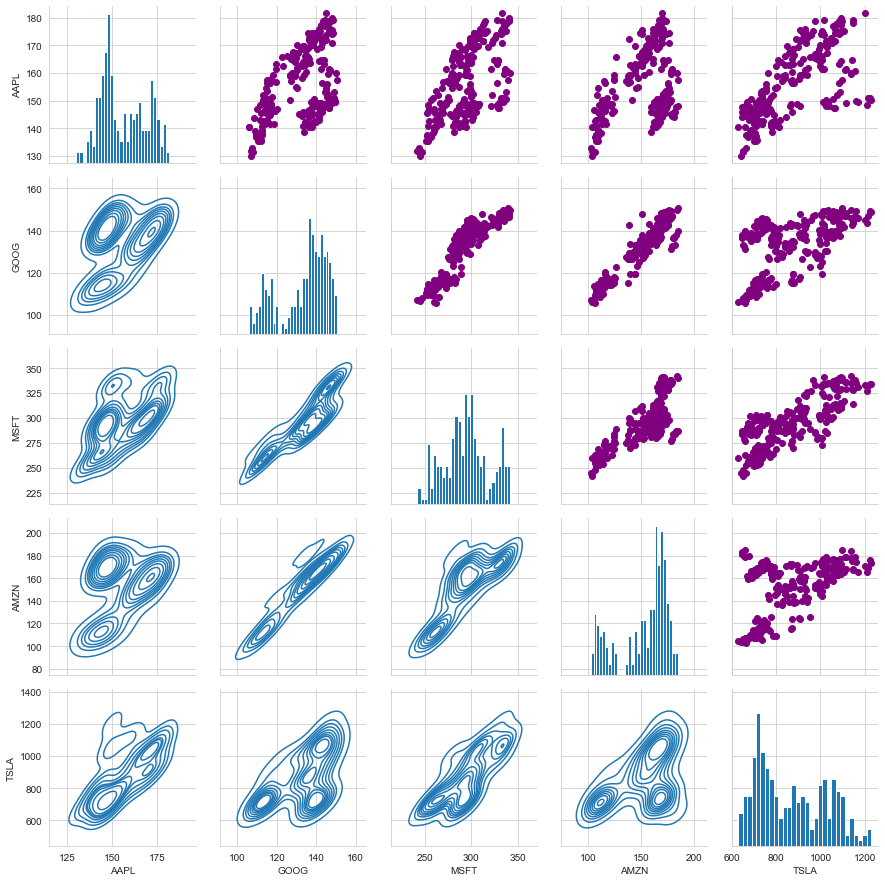

In [100]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

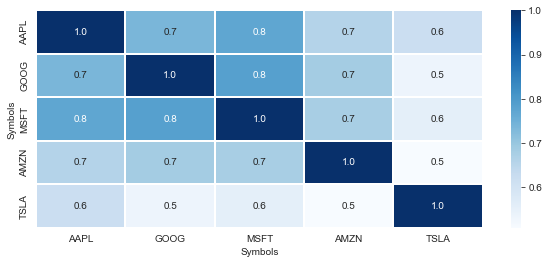

In [101]:
 
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(tech_rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

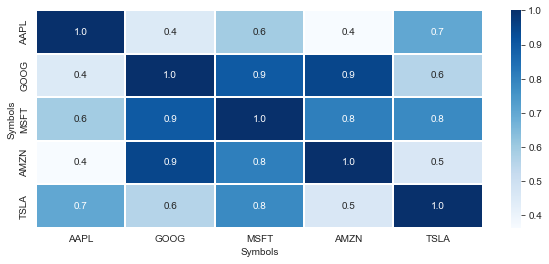

In [102]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(closing_df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

In [103]:
rets = tech_rets.dropna()

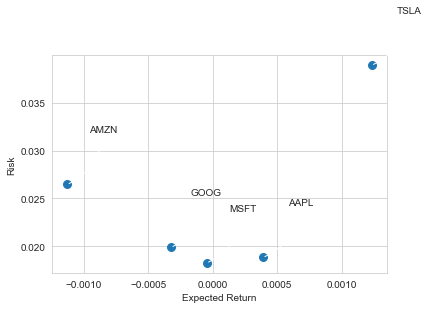

In [104]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha= 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

In [105]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2021-07-20,NaN,NaN,NaN,NaN,NaN
2021-07-21,-0.005132,0.011434,0.007447,0.003361,-0.007888
2021-07-22,0.009629,0.005490,0.016844,0.014736,-0.009202
2021-07-23,0.011989,0.033657,0.012337,0.005115,-0.009056
2021-07-26,0.002895,0.013268,-0.002141,0.011809,0.022133
...,...,...,...,...,...
2022-07-14,0.020482,-0.006658,0.005381,0.002083,0.005372
2022-07-15,0.011450,0.011908,0.010390,0.026394,0.007357
2022-07-18,-0.020643,-0.025335,-0.009621,0.001849,0.001999


In [106]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2021-07-21,-0.005132,0.011434,0.007447,0.003361,-0.007888
2021-07-22,0.009629,0.005490,0.016844,0.014736,-0.009202
2021-07-23,0.011989,0.033657,0.012337,0.005115,-0.009056
2021-07-26,0.002895,0.013268,-0.002141,0.011809,0.022133
2021-07-27,-0.014900,-0.020395,-0.008684,-0.019847,-0.019525


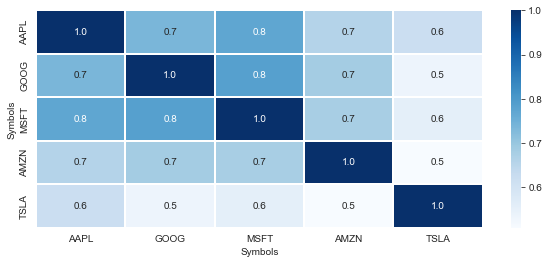

In [107]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

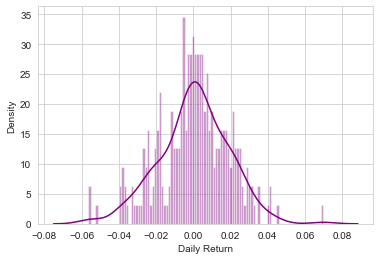

In [108]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [109]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2021-07-21,-0.005132,0.011434,0.007447,0.003361,-0.007888
2021-07-22,0.009629,0.005490,0.016844,0.014736,-0.009202
2021-07-23,0.011989,0.033657,0.012337,0.005115,-0.009056
2021-07-26,0.002895,0.013268,-0.002141,0.011809,0.022133
2021-07-27,-0.014900,-0.020395,-0.008684,-0.019847,-0.019525


In [110]:
rets['AAPL'].quantile(0.05)

-0.03231903424926902

In [111]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [112]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-20,132.001343,129.188400,130.003998,131.101501,19084000.0,131.101501
2021-07-21,132.617249,130.601501,130.787003,132.600494,14742000.0,132.600494
2021-07-22,133.504501,132.399994,132.649994,133.328506,13608000.0,133.328506
2021-07-23,138.808502,134.700500,135.259995,137.815994,26378000.0,137.815994
2021-07-26,139.712997,137.651001,138.250000,139.644501,23052000.0,139.644501


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

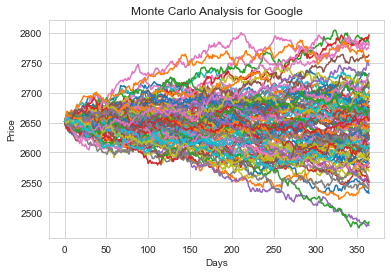

In [113]:
start_price = 2651.89
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [114]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

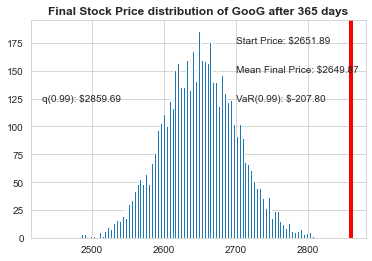

In [115]:
q = np.quantile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s = "Start Price: $%.2f" %start_price)
plt.figtext(0.6,0.7, "Mean Final Price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price-q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u"Final Stock Price distribution of GooG after %s days" % days,weight='bold');

# Predicting the closing price stock price of APPLE inc:

In [116]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007
2022-07-19,151.229996,146.910004,147.919998,151.000000,82815300.0,151.000000
2022-07-20,153.720001,150.369995,151.119995,153.365005,50558115.0,153.365005


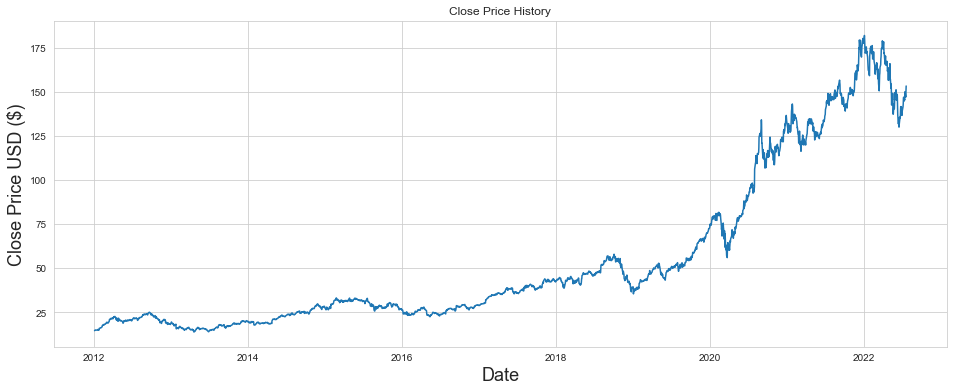

In [117]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [118]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2522

In [119]:
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.79210122],
       [0.81548534],
       [0.82955752]])

In [121]:
scaler

MinMaxScaler()

In [122]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [123]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2462/2462 [==============================] - 95s 37ms/step - loss: 0.0013


In [124]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.4483640644001134

C:\Users\ibrah\AppData\Local\Temp/ipykernel_17388/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


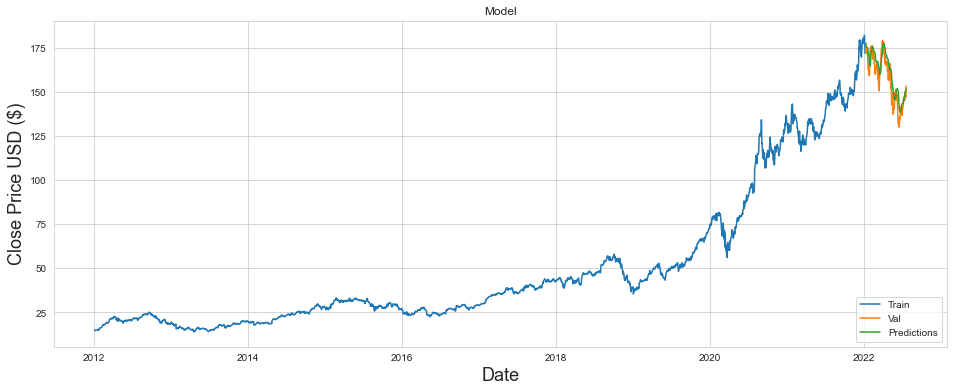

In [125]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [126]:
valid

,Close,Predictions
Date,,
2022-01-10,172.190002,177.547928
2022-01-11,175.080002,176.404190
2022-01-12,175.529999,175.803864
2022-01-13,172.190002,175.620438
2022-01-14,173.070007,175.292297
...,...,...
2022-07-14,148.470001,148.866028
2022-07-15,150.169998,149.568008
2022-07-18,147.070007,150.457153
